content 디렉토리가 구글 클라우드의 리눅스의 개인 계정을 위한 home 디렉토리라고 생각하면 됨


<div><div class="highlight-default notranslate"><div class="highlight"><pre><span></span>content/
├─ scripts/ (Google Drive Mount)
│  └─ preprocessing/
├─ models/
│  ├─ community/
│  ├─ official/
│  ├─ orbit/
│  ├─ research/
│  └─ ...
└─ workspace/ (Google Drive Mount)
    └─ training_demo/
</pre></div>


<div><div class="highlight-default notranslate"><div class="highlight"><pre><span></span>training_demo/
├─ annotations/
├─ exported-models/
├─ images/
│  ├─ test/
│  └─ train/
├─ models/
├─ pre-trained-models/
└─ README.md
</pre></div>

* annotations: This folder will be used to store all *.csv files and the respective TensorFlow *.record files, which contain the list of annotations for our dataset images.

* exported-models: This folder will be used to store exported versions of our trained model(s).

* images: This folder contains a copy of all the images in our dataset, as well as the respective *.xml files produced for each one, once labelImg is used to annotate objects.

   * images/train: This folder contains a copy of all images, and the respective *.xml files, which will be used to train our model.

   * images/test: This folder contains a copy of all images, and the respective *.xml files, which will be used to test our model.

* models: This folder will contain a sub-folder for each of training job. Each subfolder will contain the training pipeline configuration file *.config, as well as all files generated during the training and evaluation of our model.

* pre-trained-models: This folder will contain the downloaded pre-trained models, which shall be used as a starting checkpoint for our training jobs.

In [ ]:
from google.colab import drive
drive.mount('/content/google_drive')

Mounted at /content/google_drive


In [ ]:
%%bash
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace"
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/scripts"
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/scripts/preprocessing"
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo"
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models"
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images"
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations"
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test"
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/train"
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models"
mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/pre-trained-models"


구글드라이브에 workspace를 구성하기 위해 단 한번만 아래의 압축파일 복사와 압축 해제 명령어를 수행한다.

In [ ]:
!cp "/content/google_drive/MyDrive/datasets/VOCtrainval_11-May-2012.tar" ./

In [ ]:
!pwd

/content


In [ ]:
# !tar -xvf /content/VOCtrainval_11-May-2012.tar 

In [ ]:
!tar -xvf ./VOCtrainval_11-May-2012.tar 

In [ ]:
!ls -al

total 1952804
drwxr-xr-x 1 root root       4096 Nov 18 00:11 .
drwxr-xr-x 1 root root       4096 Nov 18 00:09 ..
drwxr-xr-x 4 root root       4096 Nov 16 14:34 .config
drwx------ 5 root root       4096 Nov 18 00:10 google_drive
drwxr-xr-x 1 root root       4096 Nov 16 14:35 sample_data
drwxrwxrwx 3 root root       4096 May 11  2012 VOCdevkit
-rw------- 1 root root 1999639040 Nov 18 00:11 VOCtrainval_11-May-2012.tar


In [ ]:
%cd ./VOCdevkit/VOC2012/JPEGImages/

/content/VOCdevkit/VOC2012/JPEGImages


In [ ]:
!ls -l


-rwxrwxrwx 1 root root 103615 Mar 10  2012 2012_004012.jpg

JPEGImages 디렉토리에 17125개의 파일들이 있다

In [ ]:
!ls -l | grep ^- | wc -l

17125


In [ ]:
imageDir = "/content/VOCdevkit/VOC2012/JPEGImages"

In [ ]:
images = [f for f in os.listdir(imageDir)
              if re.search(r'([a-zA-Z0-9\s_\\.\-\(\):])+(?i)(.jpg|.jpeg|.png)$', f)]        # 리눅스 정규 표현식 : 파일에 a-z,A-Z,0-9라 적혀있는 파일이면 모두 가져온다.

re.search(r'*+(.jpg|.jpeg|.png)$', f)

In [ ]:
ratio=0.1

In [ ]:
num_images = len(images)
num_test_images = math.ceil(ratio*num_images)
num_train_images = num_images - num_test_images

print("num_images=", num_images)
print("num_test_images=", num_test_images)
print("num_train_images=", num_train_images)

In [ ]:
train_dir = "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/train"
test_dir = "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test"

In [ ]:
source = imageDir

In [ ]:
copy_xml=True

In [ ]:
sourceXML="/content/VOCdevkit/VOC2012/Annotations"

In [ ]:
source

'/content/VOCdevkit/VOC2012/JPEGImages'

filename = 2012_000625.jpg

/content/VOCdevkit/VOC2012/JPEGImages + "/" +  2012_000625.jpg

/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test

In [ ]:
test_dir

'/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test'

In [ ]:
xmlxxx_filename = os.path.splitext("2012_000625.jpg")
print(xmlxxx_filename)

('2012_000625', '.jpg')


2012_000625.xml

In [ ]:
xmlxxx_filename[0]

'2012_000625'

In [ ]:
for i in range(num_test_images):
  idx = random.randint(0, len(images)-1)
  filename = images[idx]
  copyfile(os.path.join(source, filename), os.path.join(test_dir, filename))
  if copy_xml:
    xml_filename = os.path.splitext(filename)[0]+'.xml'
    copyfile(os.path.join(sourceXML, xml_filename), os.path.join(test_dir,xml_filename))

  images.remove(images[idx])

# for filename in images:
#   copyfile(os.path.join(source, filename), os.path.join(train_dir, filename))
#   if copy_xml:
#     xml_filename = os.path.splitext(filename)[0]+'.xml'
#     print(copyfile(os.path.join(sourceXML, xml_filename), os.path.join(train_dir, xml_filename)))

In [ ]:
for filename in images:
  copyfile(os.path.join(source, filename), os.path.join(train_dir, filename))
  if copy_xml:
    xml_filename = os.path.splitext(filename)[0]+'.xml'
    print(copyfile(os.path.join(sourceXML, xml_filename), os.path.join(train_dir, xml_filename)))

In [ ]:
def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))

In [ ]:
showimage_path = "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/train/2007_000648.jpg"

In [ ]:
image_np = load_image_into_numpy_array(showimage_path)

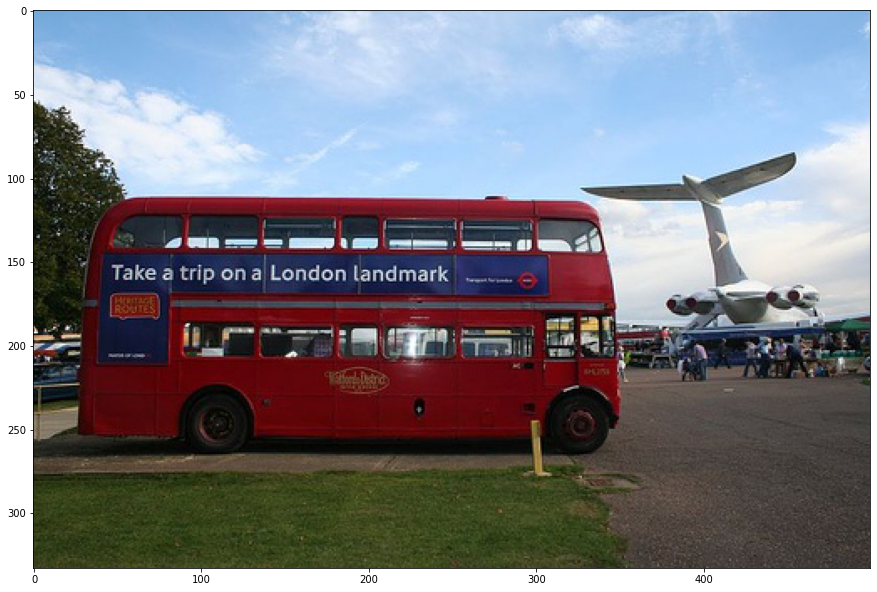

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(image_np)
plt.show()

15,412 * 2 = 30,824

In [ ]:
%cd "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/train"

/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/train


In [ ]:
!pwd

/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/train


In [ ]:
# import sys
# sys.path.append("/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/scripts/preprocessing")

In [ ]:
# sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/scripts/preprocessing']

In [ ]:
from collections import namedtuple
import xml.etree.ElementTree as ET

In [ ]:
import glob

In [ ]:
import tensorflow.compat.v1 as tf

In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
def xmls_to_csv(path):
    """Iterates through all .xml files (generated by labelImg) in a given directory and combines
    them in a single Pandas dataframe.

    Parameters:
    ----------
    path : str
        The path containing the .xml files
    Returns
    -------
    Pandas DataFrame
        The produced dataframe
    """
    print("+xmls_to_csv")
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        print("xmls_to_csv:xml_file=", xml_file)
        tree = ET.parse(xml_file)
        root = tree.getroot()
        filename = root.find('filename').text
        width = int(root.find('size').find('width').text)
        height = int(root.find('size').find('height').text)
        for member in root.findall('object'):
            bndbox = member.find('bndbox')
            xminf = float(bndbox.find('xmin').text)
            yminf = float(bndbox.find('ymin').text)
            xmaxf = float(bndbox.find('xmax').text)
            ymaxf = float(bndbox.find('ymax').text)
            value = (filename,
                     width,
                     height,
                     member.find('name').text,
                     int(xminf),
                     int(yminf),
                     int(xmaxf),
                     int(ymaxf),
                    #  int(bndbox.find('xmin').text),
                    #  int(bndbox.find('ymin').text),
                    #  int(bndbox.find('xmax').text),
                    #  int(bndbox.find('ymax').text),
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height',
                   'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)

    print("-xmls_to_csv")
    return xml_df

In [ ]:
output_path = "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations/testexam.record"
image_dir = "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test"
xml_dir = "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test"

In [ ]:
csv_path = "/content/examples_to_csv.xlsx"

In [ ]:
xml_dir

'/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test'

In [ ]:
examples = xmls_to_csv(xml_dir)


In [ ]:
print(examples)

             filename  width  height        class  xmin  ymin  xmax  ymax
0     2007_002954.jpg    500     375       person   118    22   200   292
1     2007_002954.jpg    500     375       person   351   166   461   375
2     2011_003734.jpg    500     375       person    22    87   122   312
3     2011_003734.jpg    500     375       person   145    96   239   327
4     2011_003734.jpg    500     375       person   265   111   368   344
...               ...    ...     ...          ...   ...   ...   ...   ...
3957  2009_002676.jpg    500     375          car   163    42   184    53
3958  2009_004769.jpg    375     500  diningtable     1   326   375   500
3959  2009_004769.jpg    375     500        chair    90   415   249   500
3960  2009_004769.jpg    375     500        chair   275   395   375   500
3961  2009_004769.jpg    375     500        chair    33   328   125   357

[3962 rows x 8 columns]


In [ ]:
def splits(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]

In [ ]:
grouped = splits(examples, 'filename')

In [ ]:
for group in grouped:
  print(group)
  print("****************************")

In [ ]:
examples.to_csv(csv_path, index=None)

In [ ]:
nonametupletest = (1,2)

In [ ]:
nonametupletest

(1, 2)

In [ ]:
Point = namedtuple('Point', ['x', 'y'])
Point.__doc__                   # docstring for the new class

'Point(x, y)'

In [ ]:
p = Point(11, 22)             # instantiate with positional args or keywords
print(p)

Point(x=11, y=22)


In [ ]:
p = Point(11, y=22)             # instantiate with positional args or keywords
p[0] + p[1]   

33

In [ ]:
!ls -l | grep ^- | wc -l

30824


In [ ]:
!nvidia-smi

In [ ]:
# This Colab requires TF 2.5.
!pip install -U "tensorflow>=2.5"

In [ ]:
import os
import pathlib
import time

import matplotlib
import matplotlib.pyplot as plt

import io
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from six.moves.urllib.request import urlopen

import tensorflow as tf
# import tensorflow_hub as hub

tf.get_logger().setLevel('ERROR')

In [ ]:
import re
from shutil import copyfile
import argparse
import math
import random

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

In [ ]:
%matplotlib inline

In [ ]:
!pwd

/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/train


In [ ]:
%cd /content/

In [ ]:
# Clone the tensorflow models repository
!git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3533, done.
remote: Counting objects: 100% (3533/3533), done.
remote: Compressing objects: 100% (2941/2941), done.
remote: Total 3533 (delta 930), reused 1472 (delta 538), pack-reused 0
Receiving objects: 100% (3533/3533), 47.01 MiB | 34.14 MiB/s, done.
Resolving deltas: 100% (930/930), done.


리눅스 계열
* 데이반 : 소프트웨어 설치 방식 : apt[S/W 설치 프로그램]

* 레드햇 : 소프트웨어 설치 방식 : yum[S/W 설치 프로그램]

In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd /content/models/research/
protoc object_detection/protos/*.proto --python_out=.
cd /content
git clone https://github.com/cocodataset/cocoapi.git
cd /content/cocoapi/PythonAPI
make
cp -r pycocotools /content/models/research/
cd /content/models/research/
cp object_detection/packages/tf2/setup.py .
python -m pip install .
cd /content

In [ ]:
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

In [ ]:
 # !ls -al "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/train/models"

In [ ]:
# !rm -r "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/train/models"

In [ ]:
!cp "/content/models/research/object_detection/data/pascal_label_map.pbtxt" \
"/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations"

In [ ]:
!mv "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations/pascal_label_map.pbtxt" \
"/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations/label_map.pbtxt"

In [ ]:
%cd "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/scripts/preprocessing"

/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/scripts/preprocessing


In [ ]:
!pwd

/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/scripts/preprocessing


In [ ]:
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import ops as utils_ops

In [ ]:
!python generate_tfrecord.py \
-x "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/train" \
-l "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations/label_map.pbtxt" \
-o "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations/train.record"

In [ ]:
!python generate_tfrecord.py \
-x "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/images/test" \
-l "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations/label_map.pbtxt" \
-o "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/annotations/test.record"

In [ ]:
!pwd

/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/scripts/preprocessing


In [ ]:
%cd /content

/content


In [ ]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz

--2022-11-14 05:27:09--  http://download.tensorflow.org/models/object_detection/tf2/20200711/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.251.12.128, 2404:6800:4003:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|142.251.12.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211996178 (202M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’

faster_rcnn_resnet5 100%[===================>] 202.17M  54.6MB/s    in 3.7s    

2022-11-14 05:27:13 (54.6 MB/s) - ‘faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz’ saved [211996178/211996178]



In [ ]:
!tar xvfzp "/content/faster_rcnn_resnet50_v1_640x640_coco17_tpu-8.tar.gz" \
-C "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/pre-trained-models"

faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/checkpoint
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/checkpoint/ckpt-0.index
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/pipeline.config
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/saved_model.pb
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
faster_rcnn_resnet50_v1_640x640_coco17_tpu-8/saved_model/variables/variables.index


In [ ]:
!mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1"

In [ ]:
!cp "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/pipeline.config" \
"/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1"

In [ ]:
%load_ext tensorboard

In [ ]:
%tensorboard --logdir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1"

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
--model_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1" \
--pipeline_config_path="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1/pipeline.config"

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
--model_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1" \
--pipeline_config_path="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1/pipeline.config" \
--checkpoint_dir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1"

In [ ]:
!ps 

In [ ]:
!kill 

In [ ]:
%tensorboard --logdir="/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1"

In [ ]:
!mkdir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v1"

In [ ]:
!python /content/models/research/object_detection/exporter_main_v2.py \
--input_type image_tensor \
--pipeline_config_path "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1/pipeline.config" \
--trained_checkpoint_dir "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/models/myft_faster_rcnn_resnet50_v1" \
--output_directory "/content/google_drive/MyDrive/Tensorflow_OD_API/faster_rcnn_resnet50_v1/workspace/training_demo/exported-models/saved_faster_rcnn_resnet50_v1"